### Groups 

To build group equivariant networks, we first must specify what group we are using. We will use the hyperoctahedral group $B_d$, that is rotations of 90 degrees and reflections of the order $d$ hypercube. We can generate the $d \times d$ matrix representations of this group by calling `geom.make_all_operators(d)`. For $d=2$ this group is isomorphic to the dihedral group D(4) and there are 8 elements. For $d=3$ there are 48 operators.

In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

import geometricconvolutions.geometric as geom

d = 2
group_operators = geom.make_all_operators(d)
print(f'd={d}, {len(group_operators)} operators')
print(f'd={d} matrix shape: {group_operators[0].shape}')

D3_operators = geom.make_all_operators(3)
print(f'd=3, {len(D3_operators)} operators')
print(f'd=3 matrix shape: {D3_operators[0].shape}')


env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0
d=2, 8 operators
d=2 matrix shape: (2, 2)
d=3, 48 operators
d=3 matrix shape: (3, 3)


We can visualize the action of this group on a vector in $d=2$. The original vector has a blue head, while the transformed vector has a red head.

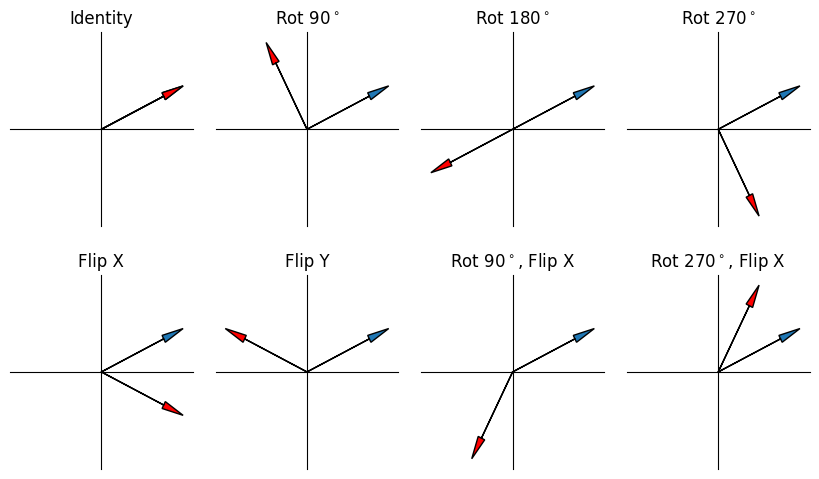

In [2]:
# Plot the action of B_2 on a vector
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp

def plot_vec(original_arrow, rotated_arrow, title, ax):
    ax.set_title(title)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    ax.arrow(
        0,
        0,
        original_arrow[0],
        original_arrow[1], 
        length_includes_head=True,
        head_width= 0.24 * 0.33,
        head_length=0.72 * 0.33,
    )
    
    ax.arrow(
        0,
        0,
        rotated_arrow[0],
        rotated_arrow[1], 
        length_includes_head=True,
        head_width= 0.24 * 0.33,
        head_length=0.72 * 0.33,
        facecolor='red',
        edgecolor='black',
    )

sorted_operators = np.stack(group_operators)[[0,5,3,6,1,2,7,4]]
original_arrow = jnp.array([2,1])/jnp.linalg.norm(jnp.array([2,1]))
rotated_arrows = [gg @ original_arrow for gg in sorted_operators]
names = [
    'Identity', 
    r'Rot $90^\circ$', 
    r'Rot $180^\circ$', 
    r'Rot $270^\circ$', 
    'Flip X', 
    'Flip Y', 
    r'Rot $90^\circ$, Flip X',
    r'Rot $270^\circ$, Flip X', 
]

num_rows = 2
num_cols = 4
bar = 8. # figure width in inches?
fig, axes = plt.subplots(num_rows, num_cols, figsize = (bar, 1.15 * bar * num_rows / num_cols), # magic
                         squeeze=False)
axes = axes.flatten()
plt.subplots_adjust(left=0.001/num_cols, right=1-0.001/num_cols, wspace=0.5/num_cols,
                    bottom=0.001/num_rows, top=1-0.1/num_rows, hspace=0.5/num_rows)

for i, rotated_arrow in enumerate(rotated_arrows):
    plot_vec(original_arrow, rotated_arrow, names[i], axes[i])

### Invariant Filters

Now, per the theoretical results in [Gregory et al. 2024](https://arxiv.org/abs/2305.12585), we can write $B_d$-equivariant functions on tensor images using the $B_d$-isotropic convolution filters. This package allows us to derive those isotropic filters via group averaging.

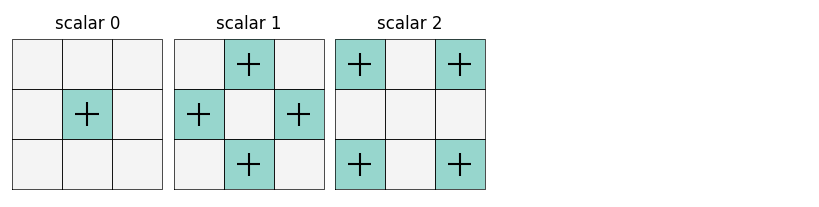

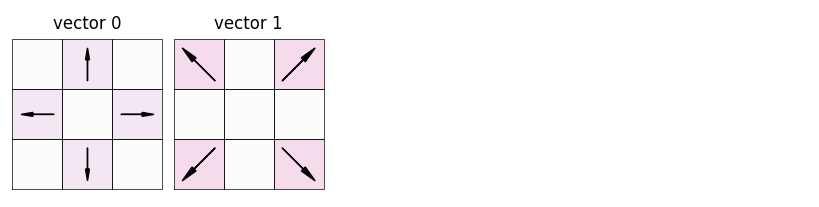

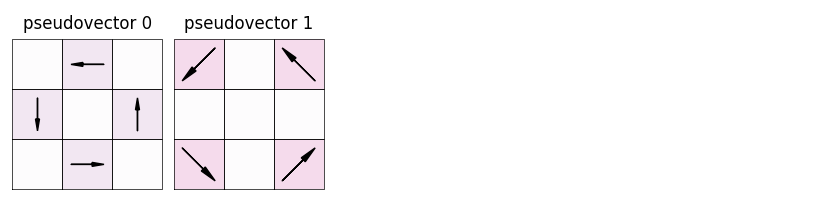

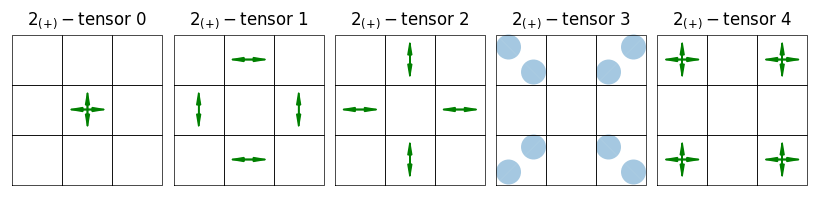

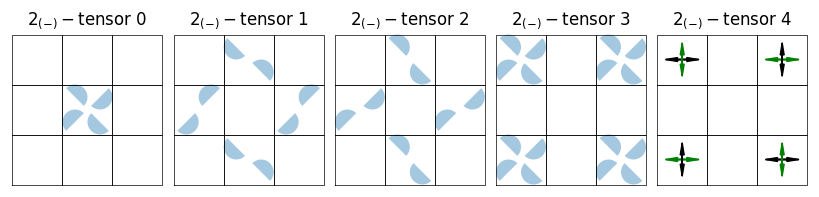

In [3]:
# Plot the 3x3 filters of tensor order 0,1,2 and parity 0 and 1.
import geometricconvolutions.utils as utils

N = 3
max_k = 2

conv_filters, maxn = geom.get_invariant_filters_dict(
    [N], # filter size
    [0,1,2], # ks, the tensor orders 
    [0,1], # tensor parities
    d, 
    group_operators, 
    scale='one', 
)

maxlen = 5
for img_list in conv_filters.values():
    if len(img_list) == 0:
        continue
    
    names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(img_list)]
    utils.plot_grid(img_list, names, maxlen);

Note that for sidelength 3, there are no pseudoscalar filters. This the complete set of $B_2$-isotropic filters for sidelength 3, both parity 0 and 1, and tensor orders 0,1, and 2. Suppose instead we would only like to be equivariant with respect to flips over the x-axis and the y-axis. We could use a subgroup of $B_d$, and then calculate the isotropic filters.

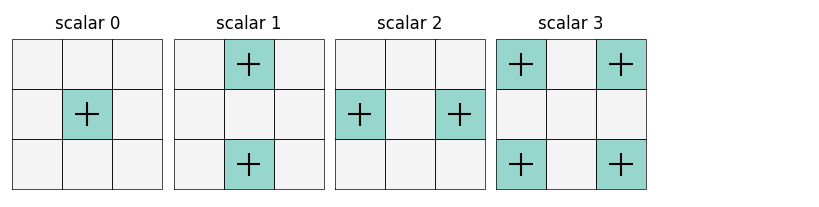

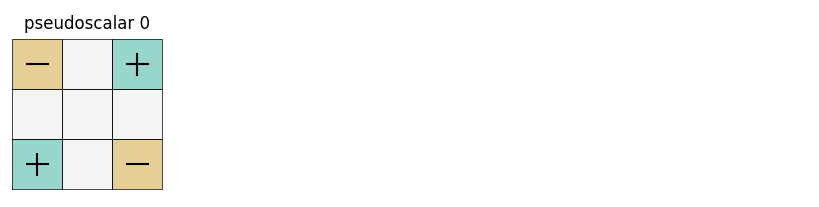

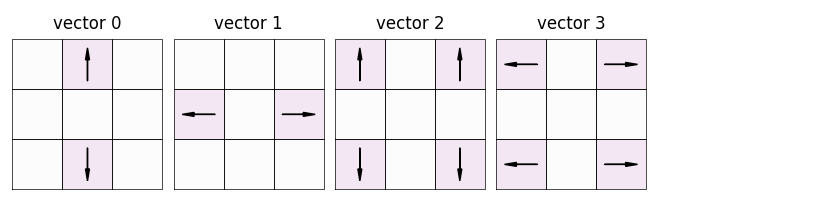

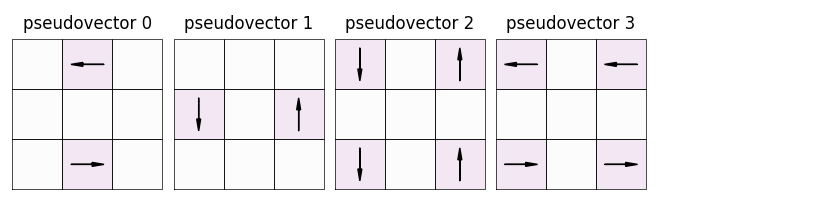

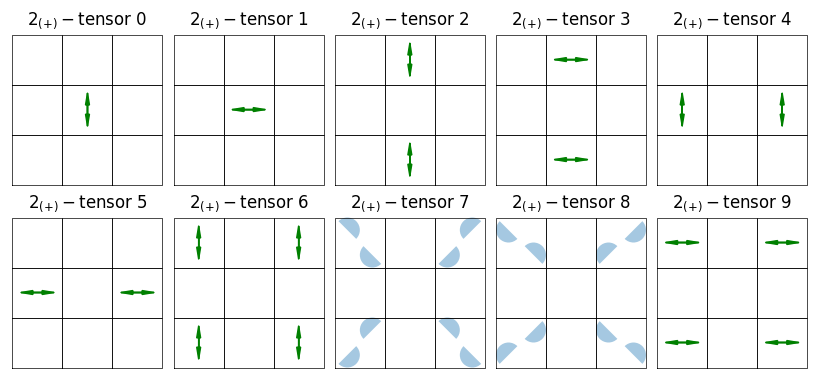

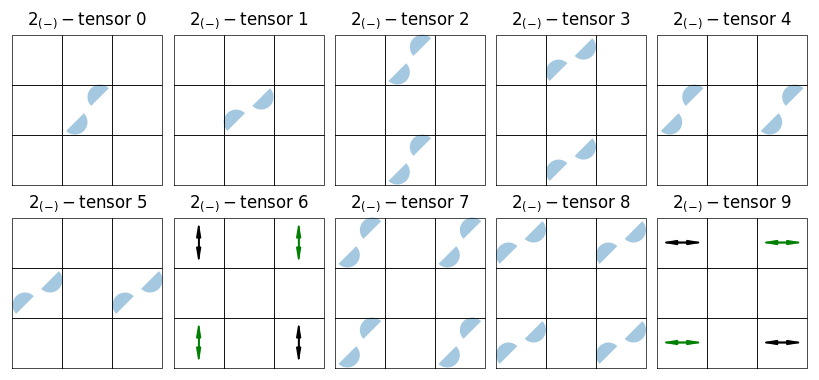

In [4]:
reflection_operators = [np.array([[-1, 0], [0, 1]]), np.array([[1,0],[0,1]]), np.array([[1,0],[0,-1]]), np.array([[-1,0],[0,-1]])]
conv_filters, maxn = geom.get_invariant_filters_dict(
    [N], # filter size
    [0,1,2], # ks, the tensor orders 
    [0,1], # tensor parities
    d, 
    reflection_operators, 
    scale='one', 
)

maxlen = 5
for img_list in conv_filters.values():
    if len(img_list) == 0:
        continue
    
    names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(img_list)]
    utils.plot_grid(img_list, names, maxlen);